<a href="https://colab.research.google.com/github/Arsen-I/ML_examples/blob/main/TimeSeries_bootcamp_HT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тут практикуемся в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

<Axes: xlabel='timestamp'>

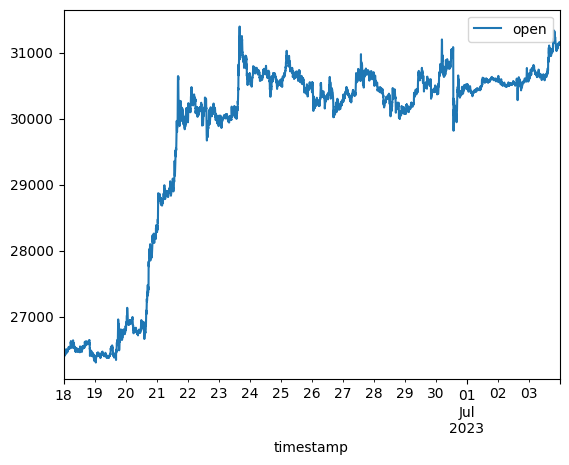

In [2]:
data = data[['open']]

data.plot()

In [14]:
data.index.hour

Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       ...
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
      dtype='int32', name='timestamp', length=4608)

Выполняем следующие шаги:

* Разбиваем данные на тренировочную и тестовую часть. В тест отправлено 15% данных

* Извлекаем лаговые признаки

* Извлекаем агрегированные признаки (средняя стоимость за день, час)

Используем функцию preprocess_dat.

Задаем гиперпараметры по умолчанию:
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [3]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [15]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    test_size = int(len(data)*0.15)
    train_size = len(data) - test_size

    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['open'].shift(i)

    data.dropna(inplace = True)

    data["hours"] = data.index.hour

    data["hours_average"] = list(map(code_mean(data.iloc[:train_size], "hours", "open").get, data.hours))

    data.drop(["hours"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:train_size].drop(["open"], axis=1)
    y_train = data.iloc[:train_size]["open"]
    X_test = data.iloc[train_size:].drop(["open"], axis=1)
    y_test = data.iloc[train_size:]["open"]



    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = preprocess_data(data)

X_train.shape, X_test.shape

((3917, 16), (672, 16))

Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

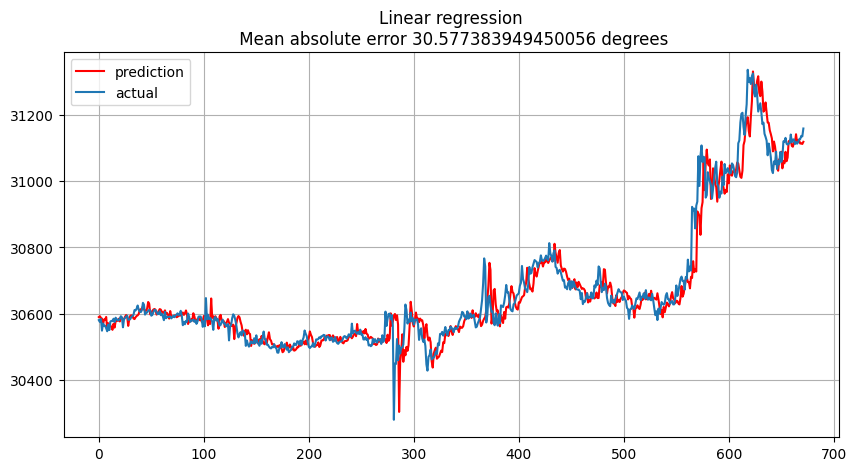

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");